
# Servo-Motor Steuerung mit Raspberry Pi und Jupyter Notebook  
<a id='servoMoto'></a>

## 1. Einführung

Dieses Jupyter [Notebook](../RaspberryPi_Jupyter_Grundlagen.ipynb) führt in die praktische Anwendung der Steuerung von [Servomotoren](https://wiki.seeedstudio.com/Grove-Servo/) mit einem [Raspberry Pi](../RaspberryPi_Jupyter_Grundlagen.ipynb) ein. 
Es kombiniert Elektronik und [Python-Programmierung](https://www.python.org/about/gettingstarted/), um grundlegende Steuerungen für Servomotoren zu erstellen und zu testen. 
Das Projekt zeigt, wie man einen analogen Servomotor mit verschiedenen Bibliotheken steuert, die Grundlagen des [PWM-Signale](https://randomnerdtutorials.com/raspberry-pi-pwm-python/) erklärt 
und den Aufbau der Schaltung beschreibt. Mit einer schrittweisen Anleitung und praxisnahen Experimenten bietet dieses Notebook eine 
solide Grundlage für Einsteiger in die Welt der Elektronik und die Nutzung des Raspberry Pi für Hardware-Projekte.


### Projektziel
Das Ziel dieses Projekts ist es, einen Servomotor mit einem Raspberry Pi zu steuern und dabei die Prinzipien der Pulsweitenmodulation ([PWM](https://randomnerdtutorials.com/raspberry-pi-pwm-python/)) anzuwenden.

### Relevanz
Dieses Projekt ist relevant, da es die Grundlagen der Elektronik und Programmierung kombiniert und ein grundlegendes Verständnis 
für die Steuerung von Motoren, insbesondere Servomotoren, entwickelt.

<iframe width="560" height="315" 
        src="https://www.youtube.com/embed/4RGCWnhy888?start=4" 
        frameborder="0" 
        allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen>
</iframe> 

<iframe width="560" height="315" 
        src="https://www.youtube.com/embed/xHDT4CwjUQE?start=10" 
        frameborder="0" 
        allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen>
</iframe>



## 2. Grundlagen und Theorie

### Servomotoren
- **Funktionsweise:** Servomotoren sind Aktoren, die eine präzise Steuerung der Winkelposition ermöglichen. 
  Sie bestehen aus einem Motor, einem Potentiometer und einer Steuerungselektronik.
- **Steuerung:** Servomotoren werden typischerweise mit einem PWM-Signal gesteuert, wobei die Pulsbreite die Position des Servos bestimmt.

**Weiteres zu [Servomotoren](https://wiki.seeedstudio.com/Grove-Servo/)**

### PWM-Signale
- **Definition:** PWM steht für Pulsweitenmodulation, eine Technik zur Steuerung der Leistung in elektronischen Schaltungen, 
  indem das Ein/Aus-Verhältnis eines Signals variiert wird.
- **Anwendung bei Servos:** Die Position des Servos wird durch die Breite des PWM-Signals gesteuert, wobei typische Servos Pulse zwischen 
  1 ms (Min-Position) und 2 ms (Max-Position) erwarten.  

#### Arten von PWM  

**Hardware-PWM (HW-PWM)**  
- Definition: HW-PWM wird durch spezielle Hardware-Register des Mikrocontrollers (z. B. Raspberry Pi) gesteuert.  
- Vorteile: Bietet eine präzise und stabile PWM-Signalausgabe. Unabhängig von anderen Prozessen, die auf dem Gerät laufen.  
- Verwendung: Ideal für zeitkritische Anwendungen wie Motorsteuerung, bei denen genaue Pulsweiten erforderlich sind. 

**PINs**
- PWM0: GPIO 12 (Pin 32), GPIO 18 (Pin 12)
- PWM1: GPIO 13 (Pin 33), GPIO 19 (Pin 35)

**Software-PWM (SW-PWM)**  
- Definition: SW-PWM wird in der Software implementiert, indem Pins durch Programmierung mit sleep() ein- und ausgeschaltet werden.  
- Nachteile: Geringere Präzision und Stabilität; kann durch andere laufende Prozesse beeinflusst werden.  
- Verwendung: Nützlich für einfache Anwendungen oder wenn Hardware-PWM nicht verfügbar ist.  

**PINs**
- GPIO 18: Häufig genutzt, da viele Tutorials und Beispiele auf diesen Pin verweisen.
- GPIO 23: Ebenfalls ein beliebter Pin für SW-PWM.
- GPIO 24: Gut geeignet für Projekte, die mehr PWM-Kanäle benötigen.

**Weiteres zu [PWM-Signals](https://randomnerdtutorials.com/raspberry-pi-pwm-python/)** 


## 3. Materialien und Werkzeuge

### Software
- [Raspbian OS](../Rasp_Pi_Einrichtung.ipynb#rasbioanOS)
- [Python 3](https://www.python.org/about/gettingstarted/)
- [Jupyter Notebook](../RaspberryPi_Jupyter_Grundlagen.ipynb)

### Hardware
- Raspberry Pi 5 Model B Rev 1.0
- Breadboard
- Jumper-Kabel
- GRV Servo Motor
- 5V Stromversorgung für den Servo


### Datenblätter
**Servo-Datenblatt:**  
- Drehmoment: 21.0/25.2oz.in
- Geschwindigkeit: 0.12/10.1 s/60°
- Spannung: 4.8-6V

**Links zum Datenblatt Sowie Servo Motor:**  
- [Servo Datenblatt](https://cdn-reichelt.de/documents/datenblatt/A300/316010005_01.pdf)
- [Gravo Servo](https://wiki.seeedstudio.com/Grove-Servo/)


### Verdrahtung
- Der Steuerungs-Pin des Servos wird mit GPIO 18 (PWM) des Raspberry Pi verbunden.
- Die Stromversorgung (Vcc) erfolgt über eine externe 5V-Quelle.
- Die Masse (GND) wird mit dem GND des Raspberry Pi verbunden.

#### PWM: GPIO 18
Pulse Width Modulation(PWM) Pins  
PWM1 – GPIO12 – Pin No 36  
PWM2 – GPIO16 – Pin No 33  
PWM1 – GPIO18 – Pin No 12  
PWM2 – GPIO19 – Pin No 35  

[Gucken Sie die komplette Erklärung von Pins hier](https://www.etechnog.com/2021/11/raspberry-pi-4-pinout-diagram-and.html)

#### Übung
In diesen Beispielen wurde der GPIO18 genutzt. Bauen Sie die Schaltung um, um PWM1 (GPIO13) zu nutzen. Zeigen Sie dem Dozent Ihre neue Schaltung und testen Sie es.  
Tipp: Gucken Sie sich das [Pinout-Bild](Bilder/Raspberry_Pi_5_GPIO-Pinout.png).


## 4. Schaltungsdesign

### Raspberry P i5 GPIO-Pinout
<img src="Bilder/Raspberry_Pi_5_GPIO-Pinout.png" alt="Rasp Pi Pinout" style="width:400px;">  

[Quelle](https://community.particle.io/t/following-getting-started-guide-for-raspberry-pi-how-do-i-use-analog-pins/27771/2)  


### Zu Servo Motor 
<img src="Bilder/GRV_Motor.png" alt="Servo Schaltung" style="width:400px;">  

[Quelle](https://cdn-reichelt.de/documents/datenblatt/A300/316010005_01.pdf)


### Schaltplan   
<img src="Bilder/Servo_Schaltung.png" alt="Servo Schaltung" style="width:400px;">  

[Erstellt durch circuito.io](https://www.circuito.io/app?components=9443,10189,200000)

**Alternativ**  

<img src="Bilder/ServoMotor_RaspPi_Schaltung.png" alt="Servo Schaltung" style="width:400px;">   

[Erstellt durch easyeda](https://easyeda.com/editor)


### Geschwindigkeit messen
Servo Motor kann mit einem Zeiger als Geschwindigkeit-Messer genutzt werden.  
Im folgenden Bild ist die Anzeige der Geschwindigkeit genauso groß wie der Bewegungsgrad des Servo Motors, nämlich 180.  

<img src="Bilder/Geschwindigkeit_messen_Servo.jpeg" alt="Geschwindigkeit messen" style="width:400px;">  


### Komponentenauswahl
- **Servomotor:** GRV Servo 21.0/25.2oz.in 0.12/10.1 s/60°
- **Jumper-Kabel:** Für die Verbindung der GPIO-Pins mit dem Servo
- **Breadboard:** Für die Schaltungsaufbauten

#### [Für Weiteres über die Verwendung von Servo mit Rasp Pi klicken Sie hier.](https://voltaat-learn.webflow.io/tutorials/how-to-controll-a-servo-motor-with-raspberry-pi-5#Wiring-it-Up)


## 5. Implementierung

### Hardware-Aufbau
1. Komponenten auf dem Breadboard wie oben beschrieben platzieren und verkabeln.
2. Raspberry Pi aufstellen und durch USB-Kabel an Rechner mit Strom versorgen.

### Software-Setup
1. Raspbian OS [installieren](../Rasp_Pi_Einrichtung.ipynb#rasbioanOS).
2. Python und Jupyter Notebook [installieren](../Installationen.ipynb#installationen).

### Installiere die RPi.GPIO und gpiozero Bibliotheken:
Für die Installationsanweisungen dieser Bibliotheken [Klicken Sie hier](../Installationen.ipynb#installationen)

In [ ]:
from gpiozero import Servo
from time import sleep

servo = Servo(18) #GPIO 18

try:
    while True:
        servo.mid()   # Mittelposition
        sleep(2)
        servo.min()   # Minimum Position
        sleep(2)
        servo.max()   # Maximum Position
        sleep(2)
except KeyboardInterrupt:
    pass

- servo.mid(): Diese Funktion stellt den Servomotor in die mittlere Position, also auf den mittleren Punkt seines Bewegungsbereichs.

- servo.min(): Diese Funktion bewegt den Servomotor in die minimale Position, also den unteren Extrempunkt seines Bewegungsbereichs.

- servo.max(): Diese Funktion bewegt den Servomotor in die maximale Position, also den oberen Extrempunkt seines Bewegungsbereichs.

Für weiteres über Servo-Bibliotheken und Funktionen klicken Sie [hier](https://gpiozero.readthedocs.io/en/stable/api_output.html#servo).

Diese Impelimentierung lässt der Zeiger dies Servos auf drei Positionen bewegen, nämlich Mittelposition, Minimum Position und Maximum Position. Auch hier wurde der GPIO 18 benutzt.

#### Übung 
- Mid, Min und Max wurden oben behandelt. Welche weitere Funktionen bietet uns Servo?
- Schreiben Sie diesen Beispiel nochmal, aber dieses Mal mit der Nutzung von [RPi.GPIO](https://www.elektronik-kompendium.de/sites/raspberry-pi/2611151.htm) Bibliothek.
- Anschließend testen Sie Ihren Code mit Rasp Pi. Funktioniert es noch wie vorhin? Zeigen Sie dem Dozent Ihre Änderungen.
- Welcher Wert (in [ms]) für die mittlere Position steht?


### Darstellung in Matplotlib
[Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html) kann verwendet werden, um die PWM-Signale oder die Bewegungsposition des Servos über die Zeit darzustellen.  
Falls ie diese Bibliothek noch nicht installiert haben, [Gucken Sie sich die Installation hier](../Installationen.ipynb#installationen).


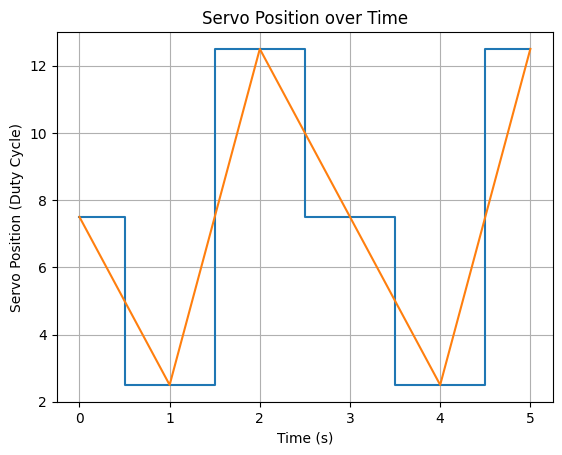

In [8]:
import matplotlib.pyplot as plt

times = [0, 1, 2, 3, 4, 5]
positions = [7.5, 2.5, 12.5, 7.5, 2.5, 12.5]

plt.step(times, positions, where='mid')  # 'mid', 'pre', or 'post' kann verwendet werden
plt.plot(times, positions)
plt.xlabel('Time (s)')
plt.ylabel('Servo Position (Duty Cycle)')
plt.title('Servo Position over Time')
plt.grid(True)
plt.show()

Die `step`-Funktion in Matplotlib ermöglicht es, die Linien zwischen den Datenpunkten entweder vertikal oder horizontal verlaufen zu lassen, anstatt diagonal. Sie können den Stil der Treppenlinien mit dem Parameter where steuern, wobei `mid`, `pre`, und `post` verschiedene Varianten darstellen.

- `pre`: Der Schritt in einem Diagramm beginnt direkt vor dem x-Wert.
- `post`: Der Schritt beginnt direkt nach dem x-Wert.
- `mid`: Der Schritt erfolgt in der Mitte zwischen zwei x-Werten.

Weiteres zu `step`- und Matplotlib-Funktionen klicken Sie [hier](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html).


### Übung:
- Finden Sie heraus, welche andere Funktionen die Matplotlib anbietet?
- Im obigen Beispiel wurde der Servo zwischen drei Positionen bewegt.  
Erweitern Sie das Beispiel, um eine langsamere Bewegung zwischen den Positionen zu simulieren.



## 6. Experimente und Ergebnisse

### Versuchsaufbau
- Der oben beschriebene Hardware-Aufbau wurde verwendet.
- Der Code wurde in einem Jupyter Notebook ausgeführt.
- Der Servo bewegte sich entsprechend den vorgegebenen Positionen.



### Beispiel 1: Schrittweise-Bewegung nach Angabe von Winkel


In diesem Beispiel wurde die Bibliotheken [RPi.GPIO](https://www.elektronik-kompendium.de/sites/raspberry-pi/2611151.htm) und time, die es schon mit Python installiert.  

Sehen Sie sich auch [The Top 5 Libraries for Every Developer](https://raspberrytips.com/top-python-libraries-rasbperry-pi/)

In [ ]:
#Falls noch nicht installiert führen Sie diesen Befehl aus.
!pip3 install RPi.GPIO

In [ ]:
#Bibliotheken importieren
import RPi.GPIO as GPIO
from time import sleep

In [ ]:
# Konfiguration der GPIO-Pins
GPIO.setmode(GPIO.BCM)
GPIO.setup(18, GPIO.OUT)  # Pin 18

In [ ]:
# Servo initialisieren
pwm = GPIO.PWM(18, 50)  # 50 Hz
pwm.start(0)

Da wir die GPIO.PWM-Klasse verwenden, nutzen wir Hardware-PWM (HW-PWM). Diese Methode ist stabiler und ermöglicht präzisere Steuerungen im Vergleich zur Software-PWM.

In [ ]:
#Motor-Bewegung durch Eingabe von Winkel
def set_angle(angle):
    duty = angle / 18 + 2
    GPIO.output(18, True)
    pwm.ChangeDutyCycle(duty)
    sleep(1)  # Warte, bis der Servo sich bewegt hat
    GPIO.output(18, False)
    pwm.ChangeDutyCycle(0)

ChangeDutyCycle ist eine Methode, die in der Bibliothek RPi.GPIO verwendet wird, um die Duty-Cycle-Eigenschaft eines PWM-Signals zu ändern. Die Duty-Cycle beschreibt das Verhältnis von Ein- zu Ausschaltzeiten eines PWM-Signals (Pulsweitenmodulation). Für weiteres zu ```RPi.GPIO``` klicken Sie  [hier](https://www.elektronik-kompendium.de/sites/raspberry-pi/2611151.htm) 

In [ ]:
try:
    while True:
        try:
            # Benutzereingabe für den gewünschten Winkel
            angle = float(input("Geben Sie den gewünschten Winkel (0-180) ein (oder 'exit' zum Beenden): "))
            
            # Eingabewert überprüfen
            if angle < 0 or angle > 180:
                print("Ungültiger Winkel. Bitte geben Sie einen Wert zwischen 0 und 180 ein.")
                continue
            
            # Servo auf den angegebenen Winkel bewegen
            set_angle(angle)
        
        except ValueError:
            user_input = input("Ungültige Eingabe. Geben Sie 'exit' zum Beenden ein: ")
            if user_input.lower()== 'exit':
                break
            else:
                print("Ungültige Eingabe. Bitte geben Sie einen Wert zwischen 0 und 180 ein.")
        
except KeyboardInterrupt:
    print("Programm wurde unterbrochen.")

finally:
    pwm.stop()
    GPIO.cleanup()

In diesem Beispiel wird man bei jedem Schritt danach gefordert, durch die Tastatur einen Winkel einzugeben. Der Servo bewegt sich dann aus der aktuellen Posiotion auf die neue durch den Winkel angegebene Posiotion. Falls der Nutzer einen Wert größer 180, was der größtmögliche Winkel des Motors ist, oder kleiner 0, was das Minimum des Servo ist, kriegt man eine Ausgabe auf Jupyter, dass eine ungültige Eingabe erfolgt wurde. Motor macht dann nichts und wartet auf eine neue Eingabe.

Übung
- Welcher Wert (in [ms]) steht für einen Winkel von 80 Grad?

### Beispiel 2: dauerhafte Bewegung

Wir nutzen die gleiche Bibliotheken und PIN-Einstellungen wie oben. Merken Sie sich hierbei den Unterschied zwischen dem obigen und dem folgenden Code.

In [ ]:
if __name__ == '__main__':
    degree = 180 #Maximum von Servo
    direction = 0 #Richtung
    try:
        while True: #Das heißt: dauerhafte Bewegung
            set_angle(degree) #Aufrufen der obigen Funktion im Beispiel 1
            print(degree) #Ausgabe, für Klarheit
            # Einstellung von Bewegungsrichtung anhand des Winkels.
            if degree == 180:
                direction = 1
            elif degree == 0:
                direction = 0
                
            if direction == 0:
                degree += 10
            else:
                degree -= 10
    except KeyboardInterrupt:
        pwm.stop()
        GPIO.cleanup()


In diesem Beispiel bewegt sich der Zeiger bzw. dreht sich der Motor ständig ohne anzuhalten. Der Servo kann nur zwischen Winkel 0 und 180. In diesem Fall bewegt sich er von 0 auf 180. Wenn der Servo 180 erreicht, bewegt sich zurück auf 0 usw. . Im Beispiel kann man bemerken, dass die Variable degree sich immer um 10 erhöht oder verkleinert. Dies ist die Größe eines Schritts des Servos. 10 wurde mit Absicht eingegeben, damit sich der Servo während Experimenten nicht sehr langsam bewegt.

### Übung:
- Suchen Sie sich einen anderen Pin, wo Sie den Servo mit einem anderen PWM-Pin verbinden und passen Sie den Code an. Funktionert der Servo immer noch? 
   <!-- - <div> <button onclick="var x = document.getElementById('hidden'); if (x.style.display === 'none') { x.style.display = 'block'; } else { x.style.display = 'none'; }">Tipp anzeigen</button>
    <div id="hidden" style="display:none;">
       Gucken Sie sich das [Pinout-Bild](Bilder/Raspberry_Pi_5_GPIO-Pinout.png).
    </div>
  </div> -->

    - Tipp: Gucken Sie sich das [Pinout-Bild](Bilder/Raspberry_Pi_5_GPIO-Pinout.png).
- Ändern Sie den Code so, dass der Servo nur 4 Schritte zwischen 0 und 180 machen kann. Wie machen Sie das?

### Zusätzliche Ressourcen 
Für besseres Verstand und für die Klarheit gucken Sie sich die folgenden Notebooks:  
- [Grundlagen-Notebook](../RaspberryPi_Jupyter_Grundlagen.ipynb)
- [Bib-Installationen](../Installationen.ipynb#installationen)
- [Raspbian OS](../Rasp_Pi_Einrichtung.ipynb#rasbioanOS)